In [80]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [81]:
with open("./src/res.json", "r") as f:
    data = json.load(f)

In [82]:
y        = [i[0] for i in data["y"]]
mu_list  = [i[0] for i in data["mu"]]
std_list = [i[0] for i in data["std"]]

In [84]:
y        = np.array(y)
mu_list  = np.array(mu_list)
std_list = np.array(std_list)

In [85]:
import matplotlib.cm as cm
from matplotlib import gridspec
import seaborn as sns

In [86]:
def plot_timeseries(input, mu, std, num_std=3, downsample_step=1, xlabel=None, ylabel=None, title=None, save_to=None):
    plt.clf()
    num_samples, num_channels = input.shape
    #colors = cm.viridis(np.linspace(0, 1, num_channels))
    downsample_every_nth = [i for i in range(0, input.shape[0], downsample_step)]

    fig = plt.figure(figsize=(40, 60))

    for idx in range(num_channels):
        x = idx % num_channels
        y = idx % 1
        gs = gridspec.GridSpec(num_channels, 2, width_ratios=[4, 1], height_ratios=[1]*num_channels)
        ax0 = plt.subplot(gs[x, y])
        plt.xlabel('time')
        plt.ylabel('distance')
        ax0.plot(input[downsample_every_nth, idx], color='black')
        ax0.plot(mu[downsample_every_nth, idx], color='red')
        ax0.plot(mu[downsample_every_nth, idx] - std[downsample_every_nth, idx] * num_std, color='blue', alpha=0.5)
        ax0.plot(mu[downsample_every_nth, idx] + std[downsample_every_nth, idx] * num_std, color='blue', alpha=0.5)

        #ax0.fill_between([i for i in range(input[downsample_every_nth].shape[0])], mu[downsample_every_nth, idx] - std[downsample_every_nth, idx] * num_std, facecolor="blue", alpha=0.1)
        #ax0.fill_between([i for i in range(input[downsample_every_nth].shape[0])], mu[downsample_every_nth, idx] + std[downsample_every_nth, idx] * num_std, facecolor="blue", alpha=0.1)

        ax1 = plt.subplot(gs[x, y + 1])
        vert_hist = np.histogram(input[downsample_every_nth, idx])
        sns.distplot(input[downsample_every_nth, idx], ax=ax1, vertical=False, bins=15, kde=False,
                     hist_kws={"color": "blue", "range": (np.min(input), np.max(input))},
                     kde_kws={"color": "blue", "lw": 3})
        plt.xlabel('frequency')
    plt.tight_layout()
    plt.title(title)
    plt.show()
    #plt.savefig(save_to, format='png')
    #plt.close()


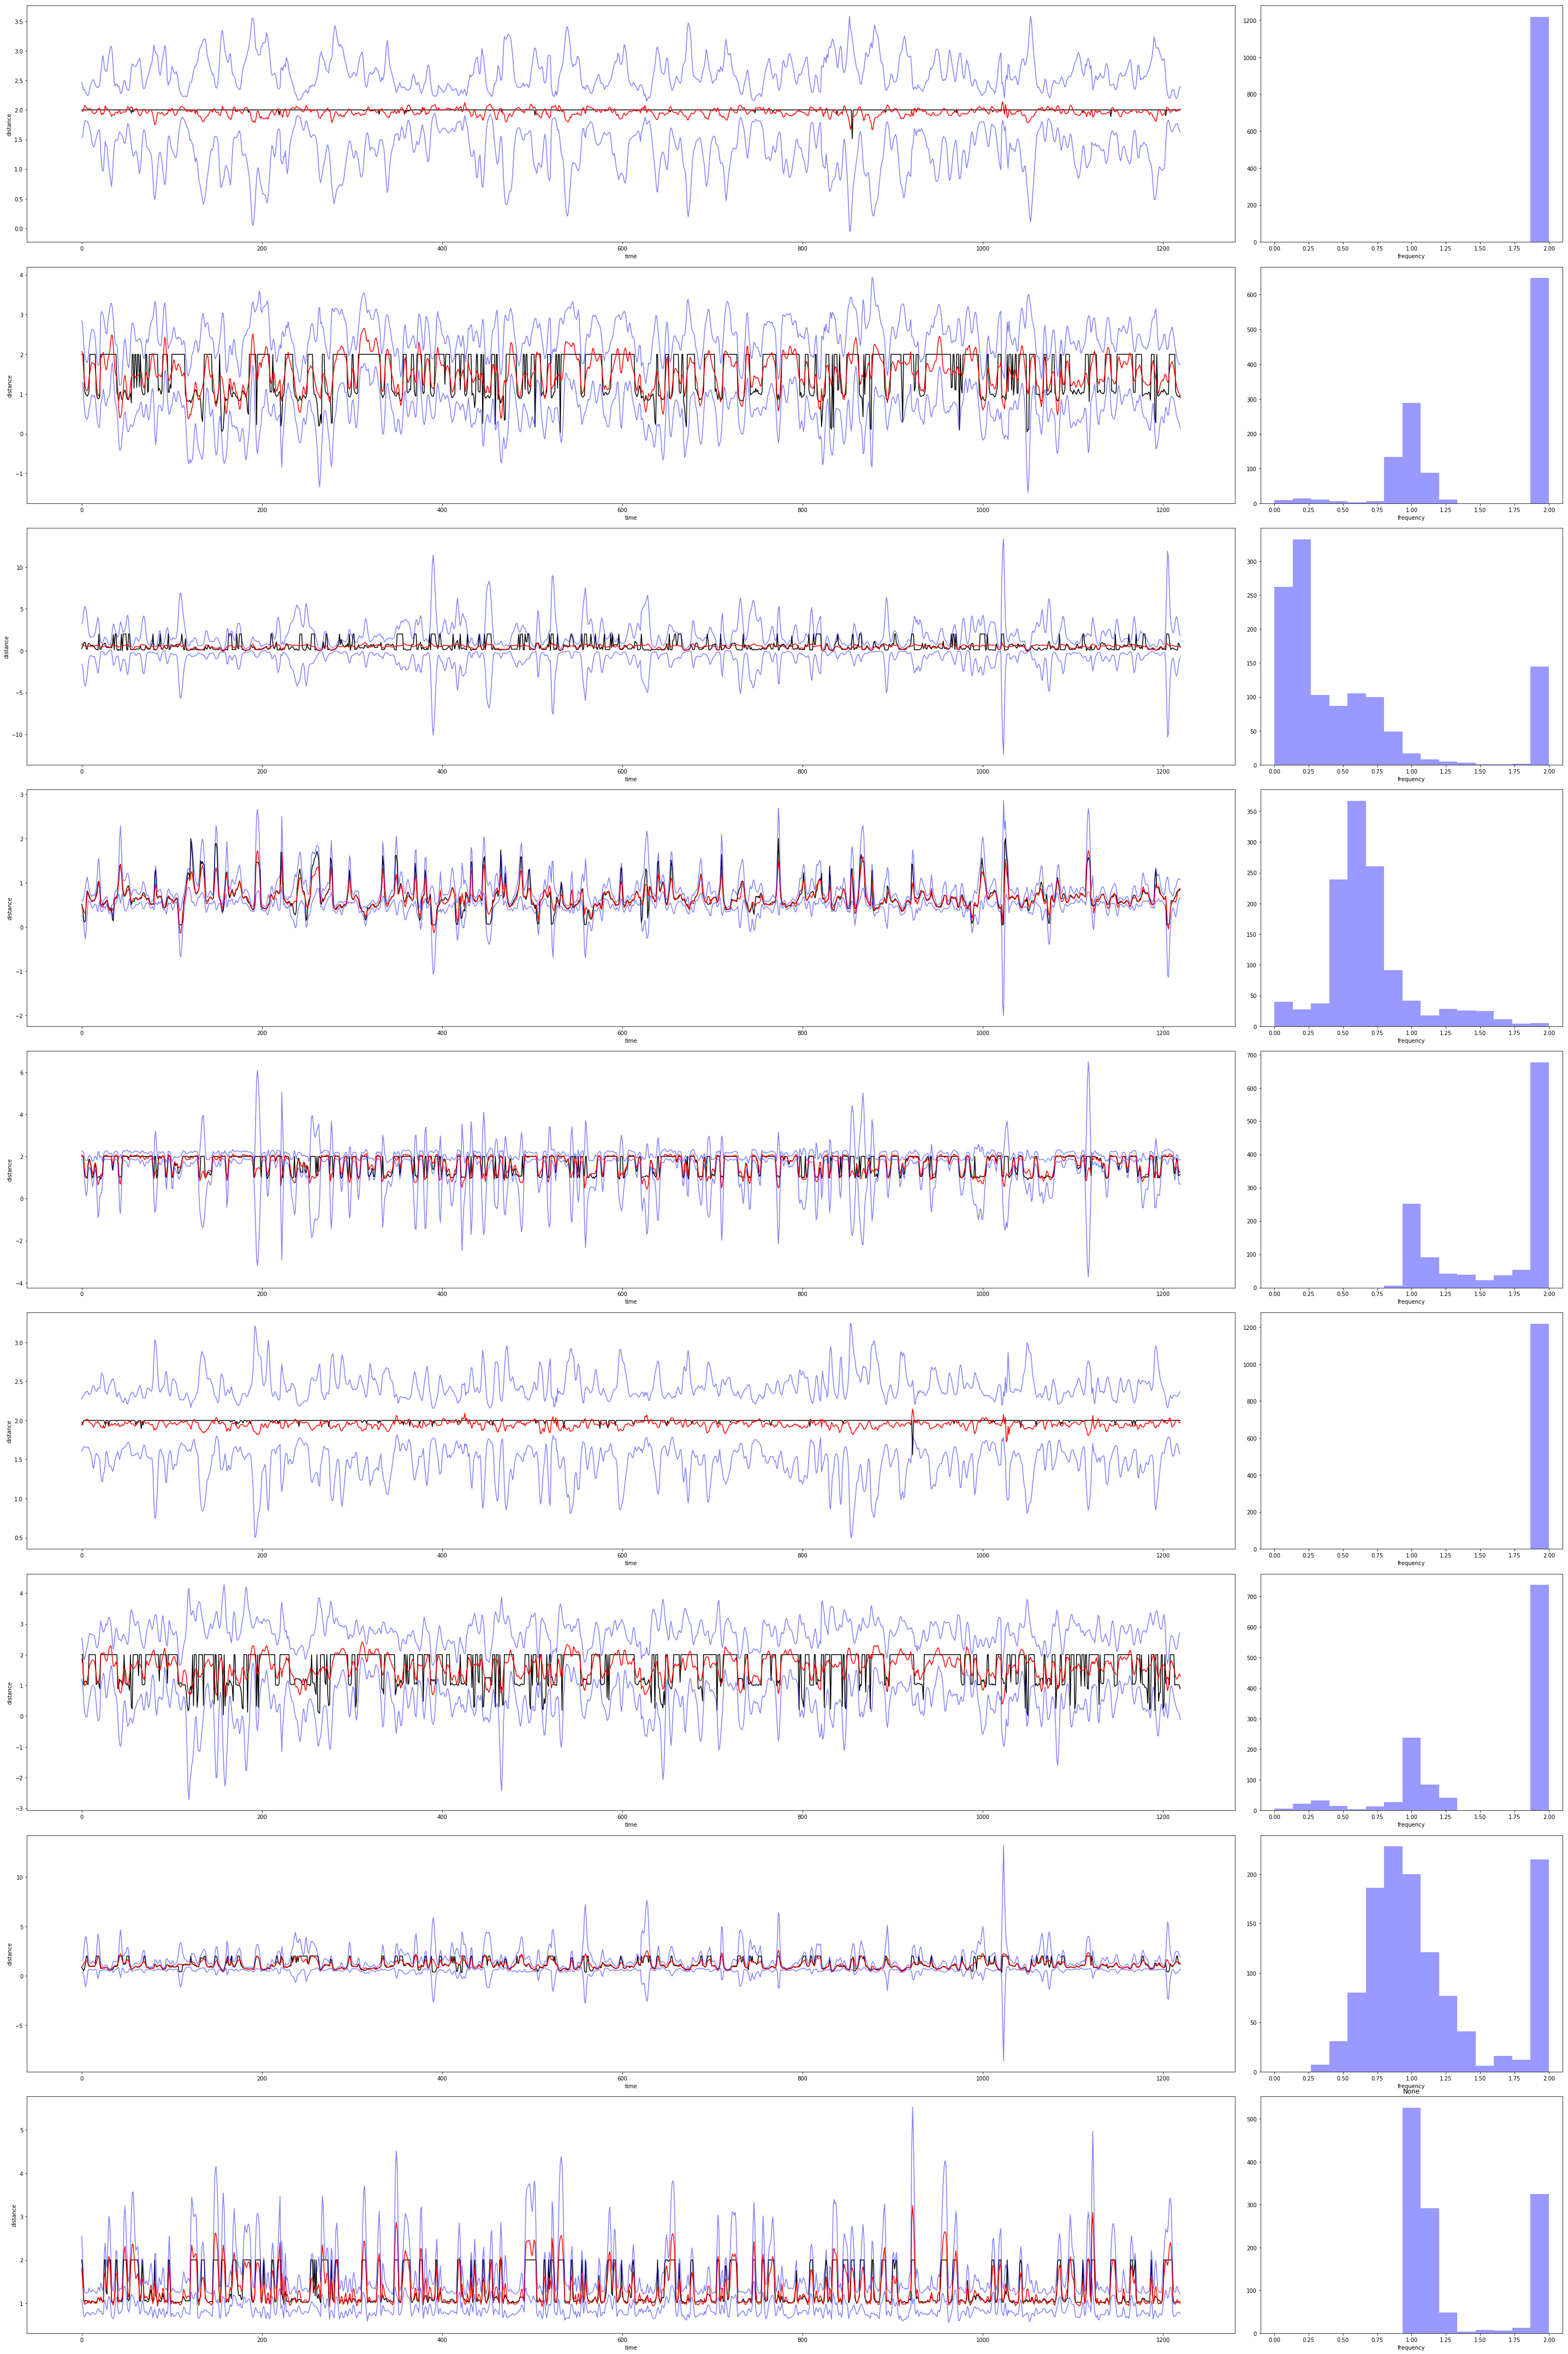

In [87]:
plot_timeseries(y, mu_list, std_list)